In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [179]:
df = pd.read_excel(r"LaptopPrice.xlsx")
df

,Company,TypeName,Inches,Ram,Weight,Price_euros
0,Apple,Ultrabook,13.3,8GB,1.37kg,1339.69
1,Apple,Ultrabook,13.3,8GB,1.34kg,898.94
2,Apple,Ultrabook,15.6,8GB,1.86kg,575.00
3,Apple,Ultrabook,15.4,16GB,1.83kg,2537.45
4,Apple,Ultrabook,13.3,8GB,1.37kg,1803.60
...,...,...,...,...,...,...
553,Apple,Notebook,17.3,8GB,2.65kg,544.15
554,Apple,Notebook,17.3,8GB,2.63kg,1280.00
555,Apple,Notebook,15.6,4GB,2kg,224.00
556,Apple,Notebook,13.3,4GB,1.35kg,255.00


In [180]:
df.head(10)

,Company,TypeName,Inches,Ram,Weight,Price_euros
0,Apple,Ultrabook,13.3,8GB,1.37kg,1339.69
1,Apple,Ultrabook,13.3,8GB,1.34kg,898.94
2,Apple,Ultrabook,15.6,8GB,1.86kg,575.00
3,Apple,Ultrabook,15.4,16GB,1.83kg,2537.45
4,Apple,Ultrabook,13.3,8GB,1.37kg,1803.60
5,Apple,Ultrabook,15.6,4GB,2.1kg,400.00
6,Apple,Ultrabook,15.4,16GB,2.04kg,2139.97
7,Apple,Ultrabook,13.3,8GB,1.34kg,1158.70
8,Apple,Ultrabook,14.0,16GB,1.3kg,1495.00
9,Apple,Ultrabook,14.0,8GB,1.6kg,770.00


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      558 non-null    object 
 1   TypeName     558 non-null    object 
 2   Inches       558 non-null    float64
 3   Ram          558 non-null    object 
 4   Weight       558 non-null    object 
 5   Price_euros  558 non-null    float64
dtypes: float64(2), object(4)
memory usage: 26.3+ KB


In [182]:
df['Ram'] = df['Ram'].apply(lambda x: x.replace('GB',''))
df['Weight'] = df['Weight'].apply(lambda x: x.replace('kg',''))
df

,Company,TypeName,Inches,Ram,Weight,Price_euros
0,Apple,Ultrabook,13.3,8,1.37,1339.69
1,Apple,Ultrabook,13.3,8,1.34,898.94
2,Apple,Ultrabook,15.6,8,1.86,575.00
3,Apple,Ultrabook,15.4,16,1.83,2537.45
4,Apple,Ultrabook,13.3,8,1.37,1803.60
...,...,...,...,...,...,...
553,Apple,Notebook,17.3,8,2.65,544.15
554,Apple,Notebook,17.3,8,2.63,1280.00
555,Apple,Notebook,15.6,4,2,224.00
556,Apple,Notebook,13.3,4,1.35,255.00


In [183]:
df['Ram'] = df['Ram'].astype(int)
df['Inches'] = df['Inches'].astype(float)
df['Weight'] = df['Weight'].astype(float)

In [184]:
df['Company'].value_counts()

Dell      223
Apple     163
Lenovo     76
Asus       74
MSI        22
Name: Company, dtype: int64

In [185]:
df['TypeName'].value_counts()

Ultrabook    511
Notebook      24
Gaming        23
Name: TypeName, dtype: int64

In [186]:
X = df.iloc[:,:-1]
X

,Company,TypeName,Inches,Ram,Weight
0,Apple,Ultrabook,13.3,8,1.37
1,Apple,Ultrabook,13.3,8,1.34
2,Apple,Ultrabook,15.6,8,1.86
3,Apple,Ultrabook,15.4,16,1.83
4,Apple,Ultrabook,13.3,8,1.37
...,...,...,...,...,...
553,Apple,Notebook,17.3,8,2.65
554,Apple,Notebook,17.3,8,2.63
555,Apple,Notebook,15.6,4,2.00
556,Apple,Notebook,13.3,4,1.35


In [187]:
y = df.iloc[:,-1]
y

0      1339.69
1       898.94
2       575.00
3      2537.45
4      1803.60
        ...   
553     544.15
554    1280.00
555     224.00
556     255.00
557     949.00
Name: Price_euros, Length: 558, dtype: float64

# tien xu ly du lieu

In [188]:
#chuyen kieu
X=pd.get_dummies(X, dtype = int, drop_first=True)
X.head(10)

,Inches,Ram,Weight,Company_Asus,Company_Dell,Company_Lenovo,Company_MSI,TypeName_Notebook,TypeName_Ultrabook
0,13.3,8,1.37,0,0,0,0,0,1
1,13.3,8,1.34,0,0,0,0,0,1
2,15.6,8,1.86,0,0,0,0,0,1
3,15.4,16,1.83,0,0,0,0,0,1
4,13.3,8,1.37,0,0,0,0,0,1
5,15.6,4,2.10,0,0,0,0,0,1
6,15.4,16,2.04,0,0,0,0,0,1
7,13.3,8,1.34,0,0,0,0,0,1
8,14.0,16,1.30,0,0,0,0,0,1
9,14.0,8,1.60,0,0,0,0,0,1


In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inches              558 non-null    float64
 1   Ram                 558 non-null    int32  
 2   Weight              558 non-null    float64
 3   Company_Asus        558 non-null    int32  
 4   Company_Dell        558 non-null    int32  
 5   Company_Lenovo      558 non-null    int32  
 6   Company_MSI         558 non-null    int32  
 7   TypeName_Notebook   558 non-null    int32  
 8   TypeName_Ultrabook  558 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 24.1 KB


# 1. TH du doan voi DL chua chuan hoa

# 2.TH du doan voi DL sau khi chuan hoa

In [190]:
from sklearn.preprocessing import MinMaxScaler

In [191]:
#chuyen hoa Inches
scaler = MinMaxScaler()
X["Inches"] = scaler.fit_transform(X[["Inches"]])
X

,Inches,Ram,Weight,Company_Asus,Company_Dell,Company_Lenovo,Company_MSI,TypeName_Notebook,TypeName_Ultrabook
0,0.385542,8,1.37,0,0,0,0,0,1
1,0.385542,8,1.34,0,0,0,0,0,1
2,0.662651,8,1.86,0,0,0,0,0,1
3,0.638554,16,1.83,0,0,0,0,0,1
4,0.385542,8,1.37,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
553,0.867470,8,2.65,0,0,0,0,1,0
554,0.867470,8,2.63,0,0,0,0,1,0
555,0.662651,4,2.00,0,0,0,0,1,0
556,0.385542,4,1.35,0,0,0,0,1,0


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((390, 9), (168, 9), (390,), (168,))

# KNN regresstion

In [193]:
knn_Reg = KNeighborsRegressor(n_neighbors=9)
knn_Reg.fit(X_train, y_train)
y_pred_knn = knn_Reg.predict(X_test)

#y_pred knn
print(pd.DataFrame({"y_test":y_test, "y_predicted": y_pred_knn}).head(10))

      y_test  y_predicted
480  1262.00  1102.384444
72    870.00   699.432222
369  1750.00  1427.555556
225   832.00  1056.321111
124   451.00   450.666667
386   549.00   580.211111
553   544.15  1200.044444
469  1858.00  1132.887778
253  1849.00  1345.422222
206   439.00   598.777778


# danh gia

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [195]:
MAE_KNN = mean_absolute_error(y_test, y_pred_knn)
RMSE_KNN = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print("MAE: ", MAE_KNN)
print("RMSE: ", RMSE_KNN)


MAE:  282.8904365079365
RMSE:  387.0671223529191


# Linear regresstion

## y = coed_*x + intercept_

In [196]:
from sklearn.linear_model import LinearRegression

## HQTT don gian

## y = b1x + b0

In [197]:
reg = LinearRegression()
reg.fit([[1],[2], [3], [4], [5], [6]],[11, 11, 14, 16, 18, 20])

print(reg.coef_) #b1
print(reg.intercept_) #b0

[1.94285714]
8.2


## HQTT da bien

## y = w1x1 + w2x2 +...+wnxn +w0

In [198]:
Linear_Reg = LinearRegression()
Linear_Reg.fit(X_train, y_train)

y_predicted = Linear_Reg.predict(X_test)
#y_predicted
print(pd.DataFrame({"y_test":y_test, "y_predicted": y_predicted}).head(10))

      y_test  y_predicted
480  1262.00  1032.069092
72    870.00   929.007038
369  1750.00  1105.154332
225   832.00  1033.319140
124   451.00   444.424872
386   549.00   670.985176
553   544.15   919.183214
469  1858.00  1587.861425
253  1849.00  1059.914958
206   439.00   792.464592


In [199]:
# w = Linear_Reg.coef_
# w
w0 = Linear_Reg.intercept_
w0

257.3984453709328

In [200]:
y_pred_lin = Linear_Reg.predict(X_test)

#y_pred
print(pd.DataFrame({"y_test":y_test, "y_predicted": y_predicted}).head(10))


      y_test  y_predicted
480  1262.00  1032.069092
72    870.00   929.007038
369  1750.00  1105.154332
225   832.00  1033.319140
124   451.00   444.424872
386   549.00   670.985176
553   544.15   919.183214
469  1858.00  1587.861425
253  1849.00  1059.914958
206   439.00   792.464592


In [201]:
MAE_Linear = mean_absolute_error(y_test, y_pred_lin)
RMSE_Linear = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("MAE Linear: ", MAE_Linear)
print("RMSE Linear: ", RMSE_Linear)


MAE Linear:  308.80451327448446
RMSE Linear:  418.0633269830687


## So sanh ket qua

In [202]:
import matplotlib.pyplot as plt

In [203]:
x = ["MAE_KNN", "MAE_Linear", "RMSE_KNN", "RMSE_Linear"]
y = [MAE_KNN, MAE_Linear, RMSE_KNN, RMSE_Linear]
y

[282.8904365079365, 308.80451327448446, 387.0671223529191, 418.0633269830687]

Text(0.5, 1.0, 'so sanh KNN va Linear regression')

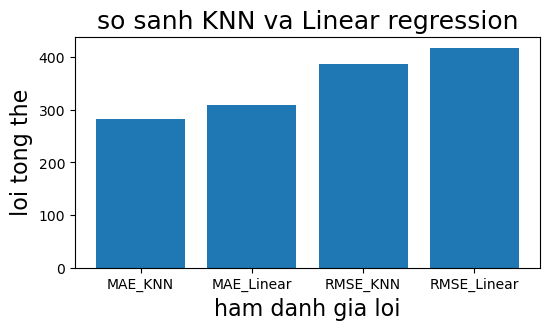

In [204]:
plt.figure(figsize=(6, 3))
plt.bar(x,y)
plt.xlabel("ham danh gia loi", fontsize = 16)
plt.ylabel("loi tong the", fontsize = 16)
plt.title("so sanh KNN va Linear regression", fontsize = 18)